In [1]:
import logging
logging.root.setLevel(logging.INFO)


In [2]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [3]:
import random

from xcs.scenarios import Scenario
from xcs.bitstrings import BitString

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze


class MazeScenario(Scenario):
    
    def __init__(self, training_cycles=5000, input_size=8):
        self.input_size = input_size
        self.maze = gym.make('Maze5-v0')
        self.possible_actions = (0, 1, 2, 3, 4, 5, 6, 7)
        self.done = False
        self.state = None
        self.reward = 0
        self.state = self.maze.reset()
        self.remaining_cycles = training_cycles
        
        self.steps_array = []
        self.steps = 0
        self.population_array = []

    def reset(self):
        self.done = False
        self.state = self.maze.reset()
        return self.state
        
    # XCS Hosford42 functions
    @property
    def is_dynamic(self):
        return False
        
    def get_possible_actions(self):
        return self.possible_actions
        
    def more(self):
        if self.done:
            self.reset()
            self.remaining_cycles -= 1
            self.steps_array.append(self.steps)
            self.steps = 0
            self.reset()
        return self.remaining_cycles >=0
        
    def sense(self):
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return BitString(''.join(no_reward_state))
    
    def execute(self, action):
        self.steps += 1
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        return self.reward

    # XCS Pyalcs functions
    def step(self, action):
        return self.maze.step(action)

In [4]:
training_cycles = 5000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(training_cycles, input_size)

In [5]:
algorithm = XCSAlgorithm()
algorithm.exploration_probability = .5
algorithm.discount_factor = 0
algorithm.wildcard_probability = .5
algorithm.do_ga_subsumption = False
algorithm.do_action_set_subsumption = False

In [6]:
model = algorithm.new_model(scenario)
model.run(scenario, learn=True)


In [7]:
print(model)


######01 => 2
    Time Stamp: 192341
    Average Reward: 20.150915594291046
    Error: 56.08671507077675
    Fitness: 0.009823325800112834
    Experience: 19
    Action Set Size: 10.736272889857277
    Numerosity: 1
#1####0# => 0
    Time Stamp: 192268
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.010795955568458035
    Experience: 0
    Action Set Size: 1
    Numerosity: 1
#1###### => 2
    Time Stamp: 192320
    Average Reward: 40.87357875585938
    Error: 83.79083644951172
    Fitness: 0.01562099240434875
    Experience: 16
    Action Set Size: 15.792548723098456
    Numerosity: 1
####0##1 => 4
    Time Stamp: 192256
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.018166092314100345
    Experience: 0
    Action Set Size: 1
    Numerosity: 1
##1##1## => 1
    Time Stamp: 192295
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.0245174429652701
    Experience: 1
    Action Set Size: 16.0
    Numerosity: 1
###0###0 => 2
    Time Stamp: 192212
    Average Reward: 0.0
 

In [8]:
print(len(model))

80


In [9]:
for rule in model:
    if rule.fitness > .05 and rule.experience >= 1:
        print(rule.condition, '=>', rule.action, ' [%.5f]' % rule.fitness)

######## => 7  [0.76793]
######## => 3  [0.72920]
######## => 4  [0.72305]
######## => 5  [0.88400]
######## => 1  [0.62315]
######## => 6  [0.77898]
######## => 0  [0.26732]
#####1## => 1  [0.17017]
#####1## => 5  [0.05985]
#######0 => 2  [0.67262]
#######0 => 3  [0.06336]
#######0 => 4  [0.08295]
#0###### => 0  [0.41361]
#######1 => 1  [0.10540]
#######1 => 4  [0.18166]
#######1 => 3  [0.18139]
1#1##01# => 0  [0.71554]
#10##### => 0  [0.17910]
#1#1#000 => 0  [0.32670]
###1#### => 1  [0.11535]
0####### => 0  [0.17079]
0####### => 6  [0.10798]
0####### => 1  [0.14132]
####1### => 3  [0.06732]
##0##### => 0  [0.23543]
##0##### => 3  [0.09750]
##0##### => 5  [0.07226]
##0##### => 7  [0.12059]
##0##### => 2  [0.08982]
#1#####0 => 2  [0.14997]
#1###0## => 2  [0.22385]
##11#### => 1  [0.05519]
##0####1 => 2  [0.16768]
##0#1#11 => 2  [0.11835]
#####0## => 5  [0.05799]
#####0## => 4  [0.08334]
#####0## => 1  [0.07163]
#####0## => 6  [0.10328]
##0##1#1 => 0  [0.05590]
#1###### => 6  [0.14699]


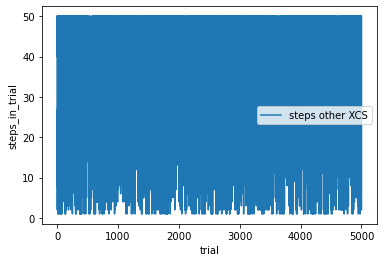

In [12]:
import pandas as pd

df = pd.DataFrame(scenario.steps_array)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

In [13]:
from lcs.agents.xcs import XCS, Configuration

cfg = Configuration(number_of_actions=8,
                    gamma=algorithm.discount_factor,
                    metrics_trial_frequency=5,
                    epsilon=1 - algorithm.exploration_probability,
                    covering_wildcard_chance=algorithm.wildcard_probability
                    )


In [14]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')

In [15]:
agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, training_cycles, False)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.012704999999982647}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 12, 'reward': [241.83315008072412, 0.0, 76.17471042766378, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.00394890000001169}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 50, 'reward': [3.5766231496816174, 0.0, 3.840253325711243, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.014733100000000832}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 8, 'reward': [125.1950956317184, 0.0, 146.13278886941458, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.0024172999999905187}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 33, 'reward': [93.1570072534941, 0.0, 119.58440894717033, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.011214700000039102}
INFO:lcs.agents.Agent:{'trial': 2500, 'steps_in_trial': 24, 'reward': [43.36118378683964, 0.0, 193.03271005813883, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0

In [16]:
for rule in explore_population:
    print(rule)


Cond:0##0#01# - Act:0 - Num:3 [fit: 0.000, exp: 3432.00, pred: 43.892]
Cond:##1####0 - Act:1 - Num:3 [fit: 0.691, exp: 2571.00, pred: 0.000]
Cond:#01#001# - Act:2 - Num:3 [fit: 0.000, exp: 647.00, pred: 67.624]
Cond:001000#0 - Act:3 - Num:1 [fit: 0.125, exp: 311.00, pred: 0.000]
Cond:######## - Act:4 - Num:3 [fit: 0.750, exp: 6016.00, pred: 0.000]
Cond:0##0001# - Act:5 - Num:1 [fit: 0.171, exp: 379.00, pred: 0.000]
Cond:#01##010 - Act:6 - Num:1 [fit: 0.167, exp: 212.00, pred: 0.000]
Cond:#0###0#0 - Act:7 - Num:1 [fit: 0.283, exp: 908.00, pred: 0.000]
Cond:1####001 - Act:0 - Num:2 [fit: 0.000, exp: 3273.00, pred: 46.537]
Cond:#1001##1 - Act:1 - Num:3 [fit: 0.750, exp: 91.00, pred: 0.000]
Cond:1#0#100# - Act:2 - Num:2 [fit: 0.000, exp: 4443.00, pred: 75.776]
Cond:1####001 - Act:3 - Num:2 [fit: 0.232, exp: 1845.00, pred: 0.000]
Cond:1##0##0# - Act:5 - Num:2 [fit: 0.545, exp: 1230.00, pred: 0.000]
Cond:1#00#001 - Act:6 - Num:3 [fit: 0.375, exp: 235.00, pred: 0.000]
Cond:#######1 - Act:7 - 

In [17]:
print(len(explore_population))

98


In [18]:
for rule in explore_population:
    if rule.fitness >= .05 and rule.experience >= 1:
        print(rule.condition, '=>', rule.action, ' [%.5f]' % rule.fitness)

##1####0 => 1  [0.69108]
001000#0 => 3  [0.12500]
######## => 4  [0.75000]
0##0001# => 5  [0.17109]
#01##010 => 6  [0.16667]
#0###0#0 => 7  [0.28330]
#1001##1 => 1  [0.74995]
1####001 => 3  [0.23237]
1##0##0# => 5  [0.54532]
1#00#001 => 6  [0.37500]
#######1 => 7  [0.59300]
##1#100# => 3  [0.54236]
00#0##00 => 5  [0.20000]
0#1###00 => 6  [0.75000]
00###11# => 1  [0.43897]
##01###1 => 3  [0.26982]
00010#1# => 5  [0.46355]
##01011# => 6  [0.45767]
##0#01## => 1  [0.20925]
1#0#01#1 => 3  [0.51521]
#1##0#11 => 5  [0.48363]
#1##011# => 6  [0.16503]
00##0#11 => 5  [0.29374]
0#1###11 => 6  [0.16108]
#00010#0 => 1  [0.74615]
###0#000 => 3  [0.49046]
##00#0#0 => 6  [0.75000]
##1##0## => 7  [0.39769]
1##1#0#0 => 1  [0.75000]
#0##0#1# => 3  [0.28978]
1##100#0 => 5  [0.20000]
####0##0 => 6  [0.48169]
#1010#0# => 1  [0.59718]
0#100### => 3  [0.48572]
#1####1# => 5  [0.19098]
100##1## => 1  [0.25000]
1#0111## => 3  [0.24871]
#######0 => 5  [0.48421]
1#01###0 => 6  [0.26222]
10011100 => 7  [0.16597]


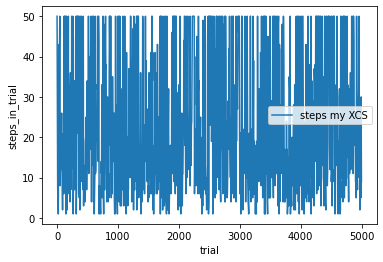

In [22]:
import pandas as pd

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
df['trial'] = df.index * cfg.metrics_trial_frequency
df.set_index('trial', inplace=True)

ax = df.plot()
ax.set_xlabel("trial") 
ax.set_ylabel("steps_in_trial")
ax.legend(["steps my XCS"])

#### Conclusions
